## Data Analysis: Study of the Evolution in Male Portuguese Swimming

In [25]:
# Import Libraries
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import time as tt
import matplotlib.dates
from more_itertools import sort_together

### 1) Data Cleaning and Datasets Organization

In [26]:
# List with all event's name

list_names = ['Free50','Free100','Free200','Free400','Free800','Free1500','Back50','Back100','Back200','Breast50',
               'Breast100','Breast200','Butterf50','Butterf100','Butterf200','Medley200','Medley400']

#### 1.1) World Records

In [27]:
# World Records Paths

Free50 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\World Records\Freestyle 50.csv"
Free100 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\World Records\Freestyle 100.csv"
Free200 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\World Records\Freestyle 200.csv"
Free400 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\World Records\Freestyle 400.csv"
Free800 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\World Records\Freestyle 800.csv"
Free1500 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\World Records\Freestyle 1500.csv"
Back50 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\World Records\Backstroke 50.csv"
Back100 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\World Records\Backstroke 100.csv"
Back200 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\World Records\Backstroke 200.csv"
Breast50 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\World Records\Breaststroke 50.csv"
Breast100 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\World Records\Breaststroke 100.csv"
Breast200 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\World Records\Breaststroke 200.csv"
Butterf50 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\World Records\Butterfly 50.csv"
Butterf100 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\World Records\Butterfly 100.csv"
Butterf200 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\World Records\Butterfly 200.csv"
Medley200 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\World Records\Medley 200.csv"
Medley400 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\World Records\Medley 400.csv"

In [28]:
# Create Dataframes for all World Records Files

csv_list_WR = [Free50,Free100,Free200,Free400,Free800,Free1500,Back50,Back100,Back200,Breast50,
               Breast100,Breast200,Butterf50,Butterf100,Butterf200,Medley200,Medley400]

i=0               
for x in list_names:
    globals()[f"WR_{x}"] = pd.read_csv(csv_list_WR[i],encoding='latin-1')
    i+=1

In [29]:
# Drop an unnecessary column from World Records

WR_Free50 = WR_Free50.drop(columns=['Unnamed: 0'])
WR_Free100 = WR_Free100.drop(columns=['Unnamed: 0'])
WR_Free200 = WR_Free200.drop(columns=['Unnamed: 0'])
WR_Free400 = WR_Free400.drop(columns=['Unnamed: 0'])
WR_Free800 = WR_Free800.drop(columns=['Unnamed: 0'])
WR_Free1500 = WR_Free1500.drop(columns=['Unnamed: 0'])
WR_Back50 = WR_Back50.drop(columns=['Unnamed: 0'])
WR_Back100 = WR_Back100.drop(columns=['Unnamed: 0'])
WR_Back200 = WR_Back200.drop(columns=['Unnamed: 0'])
WR_Breast50 = WR_Breast50.drop(columns=['Unnamed: 0'])
WR_Breast100 = WR_Breast100.drop(columns=['Unnamed: 0'])
WR_Breast200 = WR_Breast200.drop(columns=['Unnamed: 0'])
WR_Butterf50 = WR_Butterf50.drop(columns=['Unnamed: 0'])
WR_Butterf100 = WR_Butterf100.drop(columns=['Unnamed: 0'])
WR_Butterf200 = WR_Butterf200.drop(columns=['Unnamed: 0'])
WR_Medley200 = WR_Medley200.drop(columns=['Unnamed: 0'])
WR_Medley400 = WR_Medley400.drop(columns=['Unnamed: 0'])

In [30]:
# Function to return the corresponding numeric month

def returnMonth(data):

  if data.find(',') != -1:
    var = data.find(',')
    data = data[0:var]
  if data.find('.')  != -1:  
    var = data.find('.')
    data = data[0:var]
  if data.find(' ')  != -1:  
    var = data.find(' ')
    data = data[0:var]  

  if data == 'jan' or data == 'Jan' or data == 'January':
    return('01')
  elif data == 'feb' or data == 'Feb' or data == 'February':
    return('02')
  elif data == 'mar' or data == 'Mar' or data == 'March':
    return('03')
  elif data == 'apr' or data == 'Apr' or data == 'April':
    return('04')
  elif data == 'may' or data == 'May' or data == 'May':
    return('05')
  elif data == 'jun' or data == 'Jun' or data == 'June':
    return('06')
  elif data == 'jul' or data == 'Jul' or data == 'July':
    return('07')
  elif data == 'aug' or data == 'Aug' or data == 'August':
    return('08')
  elif data == 'sep' or data == 'Sep' or data == 'September':
    return('09')
  elif data == 'oct' or data == 'Oct' or data == 'October':
    return('10')
  elif data == 'nov' or data == 'Nov' or data == 'November':
    return('11')
  elif data == 'dec' or data == 'Dec' or data == 'December':
    return('12')  
  else:
    return('ERROR')                      

In [31]:
# Function to format dates from World Records

def WR_changeDataFormat(dataframe):
  i = 0
  for x in dataframe['Date']: 
    if x[0].isnumeric():
      if x.find(' ') == 2:
        day = x[0] + x[1]
        month = x[3:] 
      else:
        day = x[0]
        month = x[2:]    
    else:
      month = x[0:]
      if month.find(' ')  != -1:  
        var1 = month.find(' ')
        day = month[var1:] 
        if day.find(',') != -1:
          var2 = day.find(',')
          day = day[1:var2] 
        if day[1:].find(' ') != -1:
          var2 = day[1:].find(' ') + 1
          day = day[1:var2]  
    month = returnMonth(month) 
    year = x[-4:-1] + x[-1] 
    dataframe['Date'][i] = day + '/' + month + '/' + year 
    i += 1

In [32]:
# Change Data Format from World Records

WR_dataframes = [WR_Free50,WR_Free100,WR_Free200,WR_Free400, WR_Free800,WR_Free1500,WR_Back50,WR_Back100,WR_Back200,
                 WR_Breast50,WR_Breast100,WR_Breast200,WR_Butterf50,WR_Butterf100,WR_Butterf200,WR_Medley200,WR_Medley400]

for y in WR_dataframes:
  WR_changeDataFormat(y)

C:\Users\Joaquim Meruje\AppData\Local\Temp\ipykernel_19244\422200078.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Date'][i] = day + '/' + month + '/' + year


#### 1.2) American Records

In [33]:
# American Records Paths

Free50 =  r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\American Records\Free 50.csv"
Free100 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\American Records\100Free"
Free200 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\American Records\Free 200.csv"
Free400 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\American Records\Free 400.csv"
Free800 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\American Records\Free 800.csv"
Free1500 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\American Records\Free 1500.csv"
Back50 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\American Records\Back 50.csv"
Back100 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\American Records\Back 100.csv"
Back200 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\American Records\Back 200.csv"
Breast50 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\American Records\Breast 50.csv"
Breast100 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\American Records\Breast 100.csv"
Breast200 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\American Records\Breast 200.csv"
Butterf50 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\American Records\Butterf 50.csv"
Butterf100 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\American Records\Butterf 100.csv"
Butterf200 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\American Records\Butterf 200.csv"
Medley200 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\American Records\Medley 200.csv"
Medley400 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\American Records\Medley 400.csv"

In [34]:
# Create Dataframes for all American Records

csv_list_AR = [Free50,Free100,Free200,Free400,Free800,Free1500,Back50,Back100,Back200,Breast50,
               Breast100,Breast200,Butterf50,Butterf100,Butterf200,Medley200,Medley400]

i=0               
for x in list_names:
    globals()[f"AR_{x}"] = pd.read_csv(csv_list_AR[i],encoding='latin-1')
    i+=1

In [35]:
# Drop an unnecessary column from American Records

AR_Free50 = AR_Free50.drop(columns=['Unnamed: 0'])
AR_Free100 = AR_Free100.drop(columns=['Unnamed: 0'])
AR_Free200 = AR_Free200.drop(columns=['Unnamed: 0'])
AR_Free400 = AR_Free400.drop(columns=['Unnamed: 0'])
AR_Free800 = AR_Free800.drop(columns=['Unnamed: 0'])
AR_Free1500 = AR_Free1500.drop(columns=['Unnamed: 0'])
AR_Back50 = AR_Back50.drop(columns=['Unnamed: 0'])
AR_Back100 = AR_Back100.drop(columns=['Unnamed: 0'])
AR_Back200 = AR_Back200.drop(columns=['Unnamed: 0'])
AR_Breast50 = AR_Breast50.drop(columns=['Unnamed: 0'])
AR_Breast100 = AR_Breast100.drop(columns=['Unnamed: 0'])
AR_Breast200 = AR_Breast200.drop(columns=['Unnamed: 0'])
AR_Butterf50 = AR_Butterf50.drop(columns=['Unnamed: 0'])
AR_Butterf100 = AR_Butterf100.drop(columns=['Unnamed: 0'])
AR_Butterf200 = AR_Butterf200.drop(columns=['Unnamed: 0'])
AR_Medley200 = AR_Medley200.drop(columns=['Unnamed: 0'])
AR_Medley400 = AR_Medley400.drop(columns=['Unnamed: 0'])

In [36]:
# Function to format dates from American Records

def AR_changeDataFormat(dataframe):
  i = 0
  for x in dataframe['Date']:       
    if x[1] == '/':
      month = '0' + x[0]
      if x[4] == '/':
        day = x[2] + x[3]
        year = x[5:]
      else:
        day = '0' + x[2]
        year = x[4:]
    else:
      month =x[0] + x[1]
      if x[5] == '/':
        day = x[3] + x[4]
        year = x[6:]
      else:
        day = '0' + x[3]
        year = x[5:] 
    dataframe['Date'][i] = day + '/' + month + '/' + year  
    i+=1

In [37]:
# Change Data Format from American Records

AR_dataframes = [AR_Free50,AR_Free100,AR_Free200,AR_Free400,AR_Free800,AR_Free1500,AR_Back50,AR_Back100,AR_Back200,
                 AR_Breast50,AR_Breast100,AR_Breast200,AR_Butterf50,AR_Butterf100,AR_Butterf200,AR_Medley200,AR_Medley400]

for y in AR_dataframes:
  AR_changeDataFormat(y)                 

C:\Users\Joaquim Meruje\AppData\Local\Temp\ipykernel_19244\1454931547.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Date'][i] = day + '/' + month + '/' + year


#### 1.3) Portuguese Records

In [38]:
# Portuguese Records Urls

Free50 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\Portuguese National Records\Livres 50.csv"
Free100 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\Portuguese National Records\Livres 100.csv"
Free200 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\Portuguese National Records\Livres 200.csv"
Free400 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\Portuguese National Records\Livres 400.csv"
Free800 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\Portuguese National Records\Livres 800.csv"
Free1500 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\Portuguese National Records\Livres 1500.csv"
Back50 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\Portuguese National Records\Costas 50.csv"
Back100 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\Portuguese National Records\Costas 100.csv"
Back200 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\Portuguese National Records\Costas 200.csv"
Breast50 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\Portuguese National Records\Bruços 50.csv"
Breast100 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\Portuguese National Records\Bruços 100.csv"
Breast200 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\Portuguese National Records\Bruços 200.csv"
Butterf50 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\Portuguese National Records\Mariposa 50.csv"
Butterf100 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\Portuguese National Records\Mariposa 100.csv"
Butterf200 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\Portuguese National Records\Mariposa 200.csv"
Medley200 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\Portuguese National Records\Estilos 200.csv"
Medley400 = r"C:\Users\Joaquim Meruje\OneDrive - Universidade de Coimbra\Documentos\Python Projects\National Swimming Records\Portuguese National Records\Estilos 400.csv"

In [39]:
# Create Dataframes for all Portuguese Records

csv_list_PR = [Free50,Free100,Free200,Free400,Free800,Free1500,Back50,Back100,Back200,Breast50,
               Breast100,Breast200,Butterf50,Butterf100,Butterf200,Medley200,Medley400]

i=0               
for x in list_names:
    globals()[f"PR_{x}"] = pd.read_csv(csv_list_PR[i],encoding='latin-1')
    i+=1

In [40]:
# Drop an unnecessary column from Portuguese Records

PR_Free50 = PR_Free50.drop(columns=['Unnamed: 0'])
PR_Free100 = PR_Free100.drop(columns=['Unnamed: 0'])
PR_Free200 = PR_Free200.drop(columns=['Unnamed: 0'])
PR_Free400 = PR_Free400.drop(columns=['Unnamed: 0'])
PR_Free800 = PR_Free800.drop(columns=['Unnamed: 0'])
PR_Free1500 = PR_Free1500.drop(columns=['Unnamed: 0'])
PR_Back50 = PR_Back50.drop(columns=['Unnamed: 0'])
PR_Back100 = PR_Back100.drop(columns=['Unnamed: 0'])
PR_Back200 = PR_Back200.drop(columns=['Unnamed: 0'])
PR_Breast50 = PR_Breast50.drop(columns=['Unnamed: 0'])
PR_Breast100 = PR_Breast100.drop(columns=['Unnamed: 0'])
PR_Breast200 = PR_Breast200.drop(columns=['Unnamed: 0'])
PR_Butterf50 = PR_Butterf50.drop(columns=['Unnamed: 0'])
PR_Butterf100 = PR_Butterf100.drop(columns=['Unnamed: 0'])
PR_Butterf200 = PR_Butterf200.drop(columns=['Unnamed: 0'])
PR_Medley200 = PR_Medley200.drop(columns=['Unnamed: 0'])
PR_Medley400 = PR_Medley400.drop(columns=['Unnamed: 0'])

In [41]:
# Function to format dates from Portuguese Records

def PR_changeDataFormat(dataframe):
  i = 0
  for x in dataframe['Date']: 
    day = x[0:2]     
    month = x[3:5]
    if int(x[6:8]) > 22:
      year = '19' + x[6:8]
    else:
      year = '20' + x[6:8]  
    dataframe['Date'][i] = day + '/' + month + '/' + year 
    i+=1

In [42]:
# Change Data Format from Portuguese Records

PR_dataframes = [PR_Free50,PR_Free100,PR_Free200,PR_Free400,PR_Free800,PR_Free1500,PR_Back50,PR_Back100,PR_Back200,
                 PR_Breast50,PR_Breast100,PR_Breast200,PR_Butterf50,PR_Butterf100,PR_Butterf200,PR_Medley200,PR_Medley400]

for y in PR_dataframes:
  PR_changeDataFormat(y) 

### 2) Portuguese Records Data Agregation

In [43]:
# List of Portuguese Records

PR_Events = [PR_Free50,PR_Free100,PR_Free200,PR_Free400,PR_Free800,PR_Free1500,PR_Back50,PR_Back100,PR_Back200,PR_Breast50,
               PR_Breast100,PR_Breast200,PR_Butterf50,PR_Butterf100,PR_Butterf200,PR_Medley200,PR_Medley400]

In [44]:
# Function to extract day,month and year

def returnInfoDate(date):
  if len(date) > 9:
    day = int(date[0:2])
    month = int(date[3:5])
    year = int(date[6:10])
  else:
    day = int(date[0:1])
    month = int(date[2:4])
    year = int(date[5:9])

  return(day,month,year)

In [45]:
# Create a function to trasnforme a date in days

def date_to_days(duration):
    duration = duration.split('/')
    days = int(duration[2]) + int(duration[1])*0.01 + int(duration[0])*0.0001
    return(days)

In [46]:
# Function to transformate the time format

def returnNewTime(time1):

  if len(time1) >= 6:
    if time1[1].isnumeric() == True:
      time1_Min = int(time1[0] + time1[1])
      if len(time1) == 7:
        time1 += time1 + '0'
    else:
      time1_Min = int(time1[0])
    
    if len(time1) == 6:  
      time1 += time1 + '0'

    time1_Seg = int(time1[-5] + time1[-4])
    time1_Mil = int(time1[-2] + time1[-1])

  else:
    time1_Min = 0 
    time1_Seg = int(time1[0] + time1[1])
    if len(time1) == 4:
      time1 += time1 + '0'
    time1_Mil = int(time1[-2] + time1[-1])     

  time1 = time1_Mil*0.01 + time1_Seg + time1_Min*60

  return(time1)

In [47]:
# Function to calculate the difference between two dates

def difBetweenDates(date1, date2):
  years = date1[2] - date2[2]
  months = date1[1] - date2[1]
  days = date1[0] - date2[0]
  if months < 0:
    years -= 1
    months = 12 - date2[1] + date1[1]
  if days < 0:
    months -= 1
    if months < 0:
      months = 12 - date2[1] + date1[1]
    if date2[1] == 2:
      days = 28 - date2[0] + date1[0]
    elif date2[1] == 4 or date2[1] == 6 or date2[1] == 9 or date2[1] == 11:
      days = 30 - date2[0] + date1[0]
    else:
      days = 31 - date2[0] + date1[0]  
  d = str(days)
  m = str(months)
  y = str(years)
  return(d,m,y)

In [48]:
# Absolute National Records

i = 0
PR_Absolute = pd.DataFrame(columns=['Event','Name','Club','Date','Time','Duration','PR to the WR', 'Dif for 50m to the WR', 'WR_Year', 'Dif Date PR to the WR'])
for x in PR_Events:
  idx = len(x) -1
  name = x['Name'][idx]
  club = x['Club'][idx]
  date = x['Date'][idx]
  time = x['Time'][idx]
  data = {'Event': list_names[i], 'Name': name, 'Club': club, 'Date': date, 'Time': time}
  PR_Absolute = PR_Absolute.append(data, ignore_index=True)
  i += 1

C:\Users\Joaquim Meruje\AppData\Local\Temp\ipykernel_19244\3053423943.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PR_Absolute = PR_Absolute.append(data, ignore_index=True)
C:\Users\Joaquim Meruje\AppData\Local\Temp\ipykernel_19244\3053423943.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PR_Absolute = PR_Absolute.append(data, ignore_index=True)
C:\Users\Joaquim Meruje\AppData\Local\Temp\ipykernel_19244\3053423943.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PR_Absolute = PR_Absolute.append(data, ignore_index=True)
C:\Users\Joaquim Meruje\AppData\Local\Temp\ipykernel_19244\3053423943.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

In [49]:
# Most recent Portuguese Actual Records

dateToday = datetime.today().strftime('%Y-%m-%d')
date1 = [int(dateToday[8:10]), int(dateToday[5:7]), int(dateToday[0:4])]

i = 0
for x in PR_Absolute['Date']:
  date2 = returnInfoDate(x)
  dif = difBetweenDates(date1, date2)
  PR_Absolute['Duration'][i] = dif[0] + '/' + dif[1] + '/' + dif[2]
  i += 1

In [50]:
# Function to calculate the difference between times for 50m

def difFor50Metres(time1, time2, event):

  if event.find('1500') != -1:
    return((time1-time2) / (1500 / 50))
  elif event.find('800') != -1:
    return((time1-time2) / (800 / 50))
  elif event.find('400') != -1:
    return((time1-time2) / (400 / 50))
  elif event.find('200') != -1:
    return((time1-time2) / (200 / 50))    
  elif event.find('100') != -1:
    return((time1-time2) / (100 / 50))  
  else:
    return((time1-time2) / (50 / 50))  

In [51]:
# Percentage Ratio to the World Record

i = 0
for x in WR_dataframes:
  idx = len(x) - 1
  time1 = returnNewTime(PR_Absolute['Time'][i])  #Portuguese National Record
  time2 = returnNewTime(str(x['Time'][idx]))     #World Record
  difPercentage = ((time2 / time1)) * 100
  dif50 = difFor50Metres(time1, time2, list_names[i])
  PR_Absolute['PR to the WR'][i] = round(difPercentage,3)
  PR_Absolute['Dif for 50m to the WR'][i] = round(dif50,3)
  i += 1

In [52]:
# Calculate the year where the Portuguese Records could be World Records

j = 0
while(j < len(list_names)):
  time1 = returnNewTime(PR_Absolute['Time'][j])

  k = 0
  stop = False

  while(k < WR_dataframes[j].shape[0] - 1 and stop == False):
    time2 = returnNewTime(str(WR_dataframes[j]['Time'][k+1]))

    if k == 0 and returnNewTime(str(WR_dataframes[j]['Time'][0])) < time1:
      PR_Absolute['WR_Year'][j] = 'Não atingido'
      stop = True
    elif time2 <= time1:
      PR_Absolute['WR_Year'][j] = WR_dataframes[j]['Date'][k]
      stop = True

    k += 1
  j += 1 

In [53]:
# Calculate the difference between actual national record date and the date where the Portuguese Records could be World Records

i = 0
while(i < PR_Absolute.shape[0]):

    date1 = returnInfoDate(PR_Absolute['Date'][i])
    date2 = PR_Absolute['WR_Year'][i]

    if date2 != 'Não atingido':
        date2 = returnInfoDate(date2)
        dif = difBetweenDates(date1, date2)
        dif = dif[0] + '/' + dif[1] + '/' + dif[2]
    else:
        dif = 'Não calculavel'   

    PR_Absolute['Dif Date PR to the WR'][i] = dif

    i += 1
    

In [54]:
# Show the Absolute Portuguese Records

PR_Absolute

,Event,Name,Club,Date,Time,Duration,PR to the WR,Dif for 50m to the WR,WR_Year,Dif Date PR to the WR
0,Free50,Miguel Duarte Nascimento,slb,30/07/2022,0:21.91,19/5/0,95.436,1.0,24/03/1990,6/4/32
1,Free100,Diogo Matos Ribeiro,fpn,12/08/2022,0:48.52,6/5/0,96.579,0.83,24/06/1986,18/1/36
2,Free200,Miguel Duarte Nascimento,slb,06/04/2019,1:47.97,12/9/3,94.471,1.492,21/06/1983,15/9/35
3,Free400,Jose Paulo Lopes,fpn,06/06/2021,3.50.86,12/7/1,95.326,1.349,29/02/1980,5/3/41
4,Free800,José Paulo Lopes,fpn,22/05/2021,7:52.68,27/7/1,95.65,1.285,14/02/1982,8/3/39
5,Free1500,Guilherme Filipe Pina,scp,30/03/2017,15:15.12,19/9/5,95.181,1.47,21/06/1975,9/9/41
6,Back50,Alexis Manacas Santos,fpn,17/05/2021,0:25.28,1/8/1,93.79,1.57,Não atingido,Não calculavel
7,Back100,Joao Nogueira Costa,fpn,16/08/2022,0:53.87,2/5/0,95.786,1.135,25/08/1991,22/12/31
8,Back200,Francisco Rogerio Santos,scp,06/06/2021,1:57.06,12/7/1,95.609,1.285,13/08/1991,24/9/29
9,Breast50,Carlos Esteves Almeida,fpn,30/07/2013,0:28.16,19/5/9,92.152,2.21,Não atingido,Não calculavel


In [55]:
# Dataset to save all Portuguese Records Datasets

PR_AllRecords = pd.concat(PR_Events, keys=["Free50", "Free100", "Free200", "Free400", "Free800", "Free1500", "Back50", "Back100", "Back200",
                                    "Breast50", "Breast100", "Breast200", "Butterf50", "Butterf100", "Butterf200", "Medley200", "Medley400"])

In [56]:
# Function to calculate the longevity between 2 events

def createRecordsLongevity(dataframe, event):
  auxListDuration = []
  i = 0
  while(i<dataframe.shape[0]):
    date1 = returnInfoDate(dataframe['Date'][i])

    if i == dataframe.shape[0] - 1:
      dateToday = datetime.today().strftime('%Y-%m-%d')
      date2 = [int(dateToday[8:10]), int(dateToday[5:7]), int(dateToday[0:4])]
    
    else:
      date2 = returnInfoDate(dataframe['Date'][i+1])  
    
    dif = difBetweenDates(date2, date1)

    auxListDuration.append(dif[0] + '/' + dif[1] + '/' + dif[2])
    i += 1  
  return(auxListDuration)

In [57]:
# Create a new column for the most longevity records

durationList = []

j=0
while(j<len(list_names)):
  aux = createRecordsLongevity(PR_AllRecords.loc[list_names[j]], list_names[j])
  durationList.extend(aux)
  j+=1   
PR_AllRecords["Duration"] = durationList

In [58]:
# Function to calculate the difference betwween world records and portuguese records when was broked

def createDifBetween_WR_PR(PR_dataframe, WR_dataframe, event_idx):

  auxListDifPerc = []
  auxListDif50m = []
  
  i = 0
  while(i < PR_dataframe.shape[0]):

    PR_date = returnInfoDate(PR_dataframe['Date'][i])

    j = 0
    stop = False
    while(j < WR_dataframe.shape[0] and stop == False):

      WR_date = returnInfoDate(WR_dataframe['Date'][j])

      if(j == WR_dataframe.shape[0] - 1):
        date = WR_dataframe['Date'][j]
        name = WR_dataframe['Name'][j]
        timeAux = WR_dataframe['Time'][j]
        stop = True

      if WR_date[2] >= PR_date[2] and WR_date[1] >= PR_date[1] and WR_date[0] >= PR_date[0]:
        date = WR_dataframe['Date'][j-1]
        name = WR_dataframe['Time'][j-1]
        timeAux = WR_dataframe['Time'][j]
        stop = True

      j += 1

    time1 = returnNewTime(PR_dataframe['Time'][i])  #Portuguese National Record
    time2 = returnNewTime(str(timeAux))             #World Record
    difPercentage = ((time2 / time1)) * 100
    dif50 = difFor50Metres(time1, time2, list_names[event_idx])
    auxListDifPerc.append(round(difPercentage,3))
    auxListDif50m.append(round(dif50,3))

    i += 1

  return(auxListDifPerc, auxListDif50m)  

In [59]:
# Create new columns for:
# -> World Record Time and Name Recordist at the time the Portuguese Record was broken
# -> Difference between Portuguese Records and World Record at the time

ListDifPerc = []
ListDif50m = []

j=0
while(j<len(WR_dataframes)):
  (aux1, aux2) = createDifBetween_WR_PR(PR_AllRecords.loc[list_names[j]], WR_dataframes[j], j) 
  ListDifPerc.extend(aux1)
  ListDif50m.extend(aux2)
  j+=1   

PR_AllRecords["PR to the WR"] = ListDifPerc
PR_AllRecords["Dif for 50m to the WR"] = ListDif50m

In [60]:
# Function to calculate the year where Portuguese Records could be World Records

def createPRCanBeWR(PR_dataframe, WR_dataframe):

  auxListPRCanBeWR = []

  i = 0
  while(i < PR_dataframe.shape[0]):

    PR_time = returnNewTime(PR_dataframe['Time'][i])
    WR_firstTime = returnNewTime(str(WR_dataframe['Time'][0]))

    if PR_time > WR_firstTime:
      date = 'Não atingido'
    
    else:  
      j = 1
      stop = False
      while(j < WR_dataframe.shape[0] and stop == False):

        WR_time = returnNewTime(str(WR_dataframe['Time'][j]))

        if PR_time > WR_time:
          date = WR_dataframe['Date'][j-1]
          stop = True

        j += 1

    auxListPRCanBeWR.append(date)
    i += 1

  return(auxListPRCanBeWR)  


In [61]:
# Calculate the year where the Portuguese Records could be World Records

ListYearsWR = []

j=0
while(j<len(WR_dataframes)):
  aux = createPRCanBeWR(PR_AllRecords.loc[list_names[j]], WR_dataframes[j]) 
  ListYearsWR.extend(aux)
  j+=1   

PR_AllRecords["WR_Year"] = ListYearsWR

In [62]:
# Function to Calculate the difference between actual national record date and the date where the Portuguese Records could be World Records

def createDifDatePR_WR(dataframe, event):
    auxListDifDatePR_WR = []
    
    i = 0
    while(i<dataframe.shape[0]):
      
      date1 = returnInfoDate(dataframe['Date'][i])
      date2 = dataframe['WR_Year'][i]

      if date2 != 'Não atingido':
        date2 = returnInfoDate(date2)
        dif = difBetweenDates(date1, date2)
        dif = dif[0] + '/' + dif[1] + '/' + dif[2]
    
      else:
        dif = 'Não calculavel'  

      auxListDifDatePR_WR.append(dif)
      i += 1  
  
    return(auxListDifDatePR_WR)
    

In [63]:
# Calculate the difference between actual national record date and the date where the Portuguese Records could be World Records

ListDifDatePR_WR = []

j=0
while(j<len(WR_dataframes)):
  aux = createDifDatePR_WR(PR_AllRecords.loc[list_names[j]], list_names[j]) 
  ListDifDatePR_WR.extend(aux)
  j+=1   

PR_AllRecords["Dif Date PR to the WR"] = ListDifDatePR_WR

In [64]:
PR_AllRecords

Time                      Name Club        Date Duration  \
Free50    0   0:24.03  Sergio Alexandre Esteves  fpn  02/05/1987   20/2/1   
          1    0:23.9     Paulo Manuel Trindade  fcp  22/07/1988   20/0/2   
          2   0:23.81     Paulo Manuel Trindade  fpn  11/08/1990   22/3/0   
          3   0:23.67     Paulo Manuel Trindade  fpn  02/12/1990    7/1/0   
          4   0:23.47     Paulo Manuel Trindade  fpn  09/01/1991   11/6/0   
...               ...                       ...  ...         ...      ...   
Medley400 21  4:23.89    Carlos Esteves Almeida  fpn  24/03/2008    4/0/1   
          22  4:19.54     Diogo Filipe Carvalho  cga  28/03/2009    5/4/0   
          23  4:18.08     Diogo Filipe Carvalho  fpn  02/08/2009    2/0/4   
          24  4:16.30     Alexis Manacas Samtos  fpn  04/08/2013    2/0/3   
          25  4:15.84     Alexis Manacas Samtos  fpn  06/08/2016   12/5/6   

              PR to the WR  Dif for 50m to the WR       WR_Year  \
Free50    0         92.926                  1.700  Não atingido   
          1         92.636                  1.760  Não atingido   
          2         87.820                  2.900    14/08/1976   
          3         88.340                  2.760    23/07/1979   
          4         92.203                  1.830     2/02/1980   
...                    ...                    ...           ...   
Medley400 21        92.936                  2.330     2/04/1976   
          22        93.951                  1.963    23/05/1984   
          23        94.482                  1.780    23/05/1984   
          24        95.139                  1.558    30/07/1984   
          25        95.310                  1.500    14/08/1987   

             Dif Date PR to the WR  
Free50    0         Não calculavel  
          1         Não calculavel  
          2               28/12/14  
          3                10/4/11  
          4                7/11/10  
...                            ...  
Medley400 21              22/11/31  
          22               5/10/24  
          23               10/2/25  
          24                5/0/29  
          25              23/12/29  

[511 rows x 9 columns]

### 3) Statistics of Portuguese National Records


In [65]:
# List of Portuguese Records by clubs

PR_AllRecords['Club'].value_counts()

fpn        334
sad         43
slb         22
fcp         13
scp         12
gdlm        11
cac          9
cdna         7
cna          6
ind          5
cfp          5
lsc          4
cnf          3
sfuap        3
indu         3
anl          3
apdm         3
abve         3
gesl         2
esjb         2
aln          2
cga          2
portin       2
cns          1
anc          1
jsc          1
lgc          1
scb          1
cnlu         1
gdnfama      1
apda         1
sclm         1
cnrm         1
vsg          1
scbm         1
Name: Club, dtype: int64

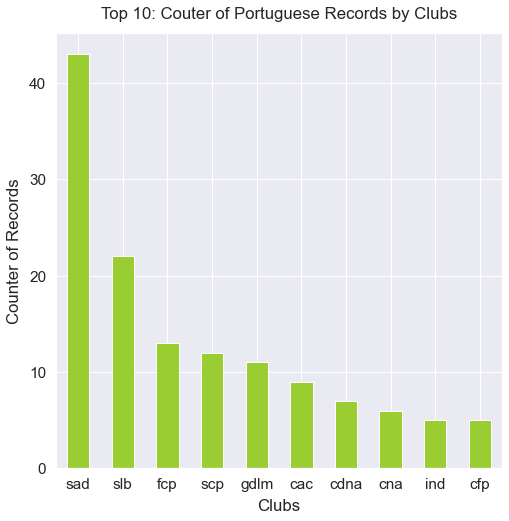

In [66]:
# Graph with Portuguese Records by clubs -> Top 10

sns.set(font_scale=1.4)
PR_AllRecords['Club'].value_counts()[1:11].plot(kind='bar', figsize=(8, 8), rot=0, color='yellowgreen')
plt.ylabel("Counter of Records", labelpad=7)
plt.xlabel("Clubs", labelpad=7)
plt.title("Top 10: Couter of Portuguese Records by Clubs", y=1.02);
plt.show()

In [67]:
# List of Portuguese Records by Name

PR_AllRecords['Name'].value_counts()

Rui Pinto Abreu             32
Paulo Jose Frischknecht     31
Nuno Filipe Laurentino      27
Simao Gomes Morgado         26
Alexandre Felske Yokochi    23
                            ..
Mario Moura Carvalho         1
Bruno Miguel Gaspar          1
Jose Antonio Bacelar         1
Vasco Ramos Cruz             1
Raul Angelo Cerqueira        1
Name: Name, Length: 83, dtype: int64

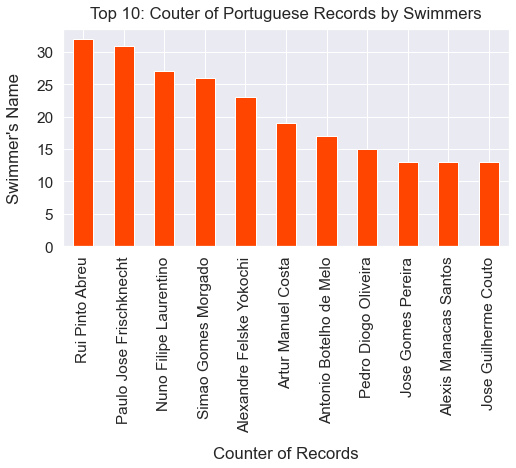

In [68]:
# Graph with Portuguese Records by Name -> Top 10

sns.set(font_scale=1.4)
PR_AllRecords['Name'].value_counts()[0:11].plot(kind='bar', figsize=(8, 4), color='orangered')
plt.xlabel("Counter of Records", labelpad=14)
plt.ylabel("Swimmer's Name", labelpad=14)
plt.title("Top 10: Couter of Portuguese Records by Swimmers", y=1.02);
plt.show()

In [69]:
# Create a Dataset to analyse Portuguese Records in a certain year

PR_Absolute_Year = pd.DataFrame(columns=['Event','Name','Club','Date','Time','Duration','PR to the WR', 'Dif for 50m to the WR', 'WR_Year', 'Dif Date PR to the WR'])

year = '1965'
date1 = '01/01/' + year
date1 = returnInfoDate(date1)
    
for x in list_names:

  i = 0
  while(i < PR_AllRecords.loc[x].shape[0]):
        
    date2 = PR_AllRecords.loc[x]['Date'][i]
    date2 = returnInfoDate(date2)

    if int(date2[2]) >= int(date1[2]):
      if int(date2[1]) >= int(date1[1]):
        if int(date2[0]) >= int(date1[0]):
          break

    i += 1  

  if i != 0:
    name = PR_AllRecords.loc[x]['Name'][i-1]
    club = PR_AllRecords.loc[x]['Club'][i-1]
    date = PR_AllRecords.loc[x]['Date'][i-1]
    time = PR_AllRecords.loc[x]['Time'][i-1]
    duration = PR_AllRecords.loc[x]['Duration'][i-1]
    PR_to_the_WR = PR_AllRecords.loc[x]['PR to the WR'][i-1]
    Dif_for_50m_to_the_WR = PR_AllRecords.loc[x]['Dif for 50m to the WR'][i-1]
    WR_Year = PR_AllRecords.loc[x]['WR_Year'][i-1]
    Dif_Date_PR_to_the_WR = PR_AllRecords.loc[x]['Dif Date PR to the WR'][i-1]
    data = {'Event': x, 'Name': name, 'Club': club, 'Date': date, 'Time': time, 'Duration': duration, 'PR to the WR': float(PR_to_the_WR), 'Dif for 50m to the WR': float(Dif_for_50m_to_the_WR), 'WR_Year': WR_Year, 'Dif Date PR to the WR': Dif_Date_PR_to_the_WR}
    PR_Absolute_Year = PR_Absolute_Year.append(data, ignore_index=True)

C:\Users\Joaquim Meruje\AppData\Local\Temp\ipykernel_19244\104989892.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PR_Absolute_Year = PR_Absolute_Year.append(data, ignore_index=True)
C:\Users\Joaquim Meruje\AppData\Local\Temp\ipykernel_19244\104989892.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PR_Absolute_Year = PR_Absolute_Year.append(data, ignore_index=True)
C:\Users\Joaquim Meruje\AppData\Local\Temp\ipykernel_19244\104989892.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PR_Absolute_Year = PR_Absolute_Year.append(data, ignore_index=True)
C:\Users\Joaquim Meruje\AppData\Local\Temp\ipykernel_19244\104989892.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

In [70]:
# Present the dataset with the Portuguese Records in a certain year

PR_Absolute_Year

,Event,Name,Club,Date,Time,Duration,PR to the WR,Dif for 50m to the WR,WR_Year,Dif Date PR to the WR
0,Free100,Herlander Felga Ribeiro,fpn,12/10/1964,0:59.0,18/9/4,89.661,3.050,24/08/1920,19/1/44
1,Free200,Herlander Felga Ribeiro,fpn,01/08/1963,2:16.5,23/0/5,86.813,4.500,10/04/1920,21/3/43
2,Free400,Antonio Bessone Basto,fpn,01/08/1963,4:42.3,0/11/10,89.338,3.763,14/08/1933,18/12/30
3,Free800,Eduardo José de Sousa,fpn,02/09/1960,10:22.9,16/11/7,82.565,6.788,8/01/1927,25/7/33
4,Free1500,Antonio Bessone Basto,fpn,08/08/1963,19:26.8,4/8/9,87.890,4.710,18/08/1926,21/12/37
5,Back100,Raul Angelo Cerqueira,fpn,30/08/1960,1:06.7,7/9/15,88.606,3.800,Não atingido,Não calculavel
6,Back200,Antonio Bessone Basto,fpn,08/07/1962,2:27.9,16/0/14,88.506,4.250,16/06/1930,22/0/32
7,Breast100,Jose Antonio Bacelar,sclm,30/08/1958,1:27.3,4/0/9,74.387,11.180,Não atingido,Não calculavel
8,Breast200,Luis Vaz Jorge,fpn,01/08/1963,2:54.0,23/11/5,85.172,6.450,12/11/1922,19/8/40
9,Butterf100,Vitor Manuel Fonseca,fpn,01/08/1963,1:04.4,28/0/4,87.422,4.050,Não atingido,Não calculavel


In [71]:
# Statistics about the difference between WR and PR -> Ratio for a choose date

PR_Absolute_Year['PR to the WR'].describe()

count    12.000000
mean     86.764250
std       4.528699
min      74.387000
25%      86.402750
50%      88.198000
75%      89.287750
max      91.540000
Name: PR to the WR, dtype: float64

In [72]:
# Statistics about the difference between WR and PR -> Diference for 50m for a choose date

PR_Absolute_Year['Dif for 50m to the WR'].describe()

count    12.000000
mean      4.979500
std       2.273786
min       2.925000
25%       3.790750
50%       4.269000
75%       5.145000
max      11.180000
Name: Dif for 50m to the WR, dtype: float64

In [112]:
# Top 20 -> Portuguese Records with the bigger duration

list_Duration_dates = []
list_Duration_idx = []
list_events_idx = ['100 Back', '100 Back', '400 Medley', '200 Back', '50 Butterf', '200 Butterf', '100 Butterf', '200 Free', '800 Free', '200 Breast', 
                   '800 Free', '1500 Free', '100 Free', '400 Free', '50 Breast', '100 Breast', '400 Medley', '50 Back', '200 Butterf', '50 Free']

i = 0
for x in PR_AllRecords['Duration']:
    days = date_to_days(x)
    list_Duration_dates.append(days)
    list_Duration_idx.append(i)
    i += 1

zipped_lists = zip(list_Duration_dates, list_Duration_idx)
sorted_pairs = sorted(zipped_lists, reverse=True)

tuples = zip(*sorted_pairs)
list_Duration_dates, list_Duration_idx = [ list(tuple) for tuple in tuples]

i = 0
for x in range(0,20):
    name = PR_AllRecords['Name'][list_Duration_idx[i]]
    event = list_events_idx[x]
    time = PR_AllRecords['Time'][list_Duration_idx[i]]
    duration = PR_AllRecords['Duration'][list_Duration_idx[i]]
    date = PR_AllRecords['Date'][list_Duration_idx[i]]
    print('Name: {:^30} || Event: {:^12} || Time: {:^8} || Duration: {:^8} || Date: {}'.format(name,event,time,duration,date))
    i += 1 


Name:     Nuno Filipe Laurentino     || Event:   100 Back   || Time: 0:56.56  || Duration:  9/3/16  || Date: 26/08/1995
Name:     Raul Angelo Cerqueira      || Event:   100 Back   || Time:  1:06.7  || Duration:  7/9/15  || Date: 30/08/1960
Name:        Rui Paulo Borges        || Event:  400 Medley  || Time: 4:30.79  || Duration:  6/6/15  || Date: 20/09/1988
Name:     Antonio Bessone Basto      || Event:   200 Back   || Time:  2:27.9  || Duration: 16/0/14  || Date: 08/07/1962
Name:      Simao Gomes Morgado       || Event:  50 Butterf  || Time: 0:23.72  || Duration: 28/12/13 || Date: 05/04/2009
Name:    Pedro Fontoura Oliveira     || Event: 200 Butterf  || Time: 1:56.17  || Duration: 21/5/13  || Date: 28/07/2009
Name:     Diogo Filipe Carvalho      || Event: 100 Butterf  || Time: 0:52.42  || Duration: 19/0/13  || Date: 29/03/2009
Name:    Paulo Jose Frischknecht     || Event:   200 Free   || Time: 1:55.06  || Duration: 13/0/13  || Date: 21/07/1980
Name:     Fernando Eurico Costa      || 

In [74]:
# List of Portuguese Records by Event

PR_ByEvents = []

for x in list_names:
  count = PR_AllRecords.loc[x].shape[0]
  PR_ByEvents.append(count)
  print('{}: {}'.format(x,count))

Free50: 20
Free100: 34
Free200: 37
Free400: 28
Free800: 35
Free1500: 33
Back50: 15
Back100: 32
Back200: 29
Breast50: 6
Breast100: 40
Breast200: 37
Butterf50: 21
Butterf100: 41
Butterf200: 26
Medley200: 51
Medley400: 26


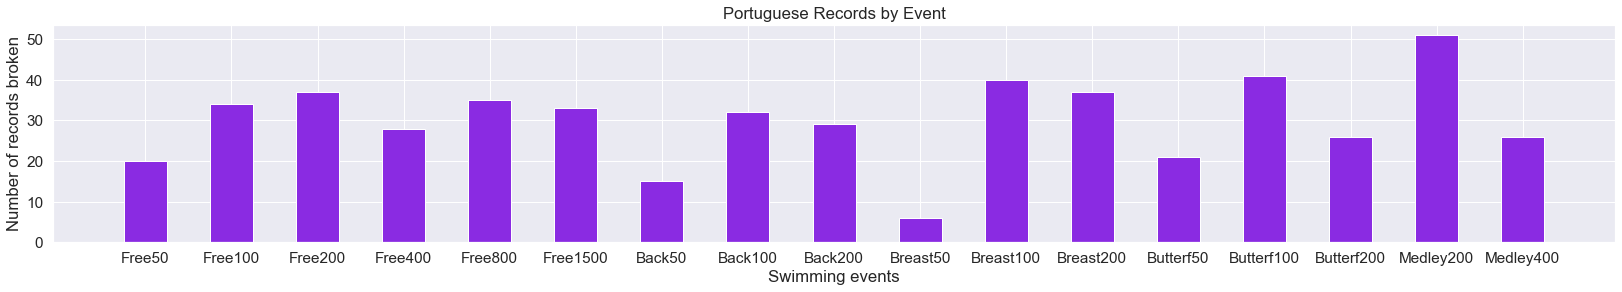

In [75]:
# Graph with Portuguese Records by Event

fig = plt.figure(figsize =(28, 4))
plt.bar(list_names, PR_ByEvents, color ='blueviolet', width = 0.5)
plt.xlabel("Swimming events")
plt.ylabel("Number of records broken")
plt.title("Portuguese Records by Event")
plt.show()

In [76]:
# Statistics about the difference between WR and PR -> Ratio

PR_AllRecords['PR to the WR'].describe()

count    511.000000
mean      90.087209
std        4.774220
min       63.491000
25%       87.604000
50%       91.345000
75%       93.521000
max       96.995000
Name: PR to the WR, dtype: float64

In [77]:
# Statistics about the difference between WR and PR -> Diference for 50m

PR_AllRecords['Dif for 50m to the WR'].describe()

count    511.000000
mean       3.281802
std        2.129450
min        0.690000
25%        1.875500
50%        2.575000
75%        4.169000
max       18.875000
Name: Dif for 50m to the WR, dtype: float64

### 4) Data Cleaning in the Times for prepare the events graphs

In [78]:
# New function to transformate the time format

def transformTime(time1):

  time1 = str(time1)

  if len(time1) >= 6:
    if time1[1].isnumeric() == True:
      time1_Min = int(time1[0] + time1[1])
      if len(time1) == 7:
        time1 += time1 + '0'
    else:
      time1_Min = int(time1[0])
    
    if len(time1) == 6:  
      time1 += time1 + '0'

    time1_Seg = int(time1[-5] + time1[-4])
    time1_Mil = int(time1[-2] + time1[-1])

  else:
    time1_Min = 0 
    time1_Seg = int(time1[0] + time1[1])
    if len(time1) == 4:
      time1 += time1 + '0'
    time1_Mil = int(time1[-2] + time1[-1])     
  
  time1 = time1_Min*60 + time1_Seg + time1_Mil*0.01

  return(time1)

In [79]:
# Function to transform the time in a dataframe

def TransformTimeDataframe(dataframe):
    
    i = 0
    for j in dataframe['Time']:
        newTime = transformTime(j)
        dataframe['NewTime'][i] = newTime
        i += 1

In [80]:
# Transform all the times in all datasets

for x in WR_dataframes:
    newTime = [i for i in range(len(x))]
    x['NewTime'] = newTime
    TransformTimeDataframe(x)

for x in AR_dataframes:
    newTime = [i for i in range(len(x))]
    x['NewTime'] = newTime
    TransformTimeDataframe(x)

for x in PR_dataframes:
    newTime = [i for i in range(len(x))]
    x['NewTime'] = newTime
    TransformTimeDataframe(x)    


C:\Users\Joaquim Meruje\AppData\Local\Temp\ipykernel_19244\3747880586.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['NewTime'][i] = newTime
C:\Users\Joaquim Meruje\AppData\Local\Temp\ipykernel_19244\3747880586.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['NewTime'][i] = newTime
C:\Users\Joaquim Meruje\AppData\Local\Temp\ipykernel_19244\3747880586.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf

In [81]:
# New function to transformate the data format

def transformDate(data):
  if len(data) >= 10:
    x = datetime(int(data[6:]), int(data[3:5]), int(data[0:2]))
  else:
    x = datetime(int(data[5:]), int(data[2:4]), int(data[0:1]))  
  return(x)

In [82]:
# Function to transform the data in a dataframe

def TransformDateDataframe(dataframe):
    
    i = 0
    for j in dataframe['Date']:
        newDate = transformDate(j)
        dataframe['NewDate'][i] = newDate
        i += 1

In [83]:
# Transform all the dates in all datasets

for x in WR_dataframes:
    newDate = [i for i in range(len(x))]
    x['NewDate'] = newDate
    TransformDateDataframe(x)

for x in AR_dataframes:
    newDate = [i for i in range(len(x))]
    x['NewDate'] = newDate
    TransformDateDataframe(x)

for x in PR_dataframes:
    newDate = [i for i in range(len(x))]
    x['NewDate'] = newDate
    TransformDateDataframe(x)  

C:\Users\Joaquim Meruje\AppData\Local\Temp\ipykernel_19244\555743532.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['NewDate'][i] = newDate
C:\Users\Joaquim Meruje\AppData\Local\Temp\ipykernel_19244\555743532.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['NewDate'][i] = newDate
C:\Users\Joaquim Meruje\AppData\Local\Temp\ipykernel_19244\555743532.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafram

### 5) Evolution Graphs for World, American and Portuguese Records

#### 5.1) Analisys for all events

##### 5.1.1) Freestyle short distances Events

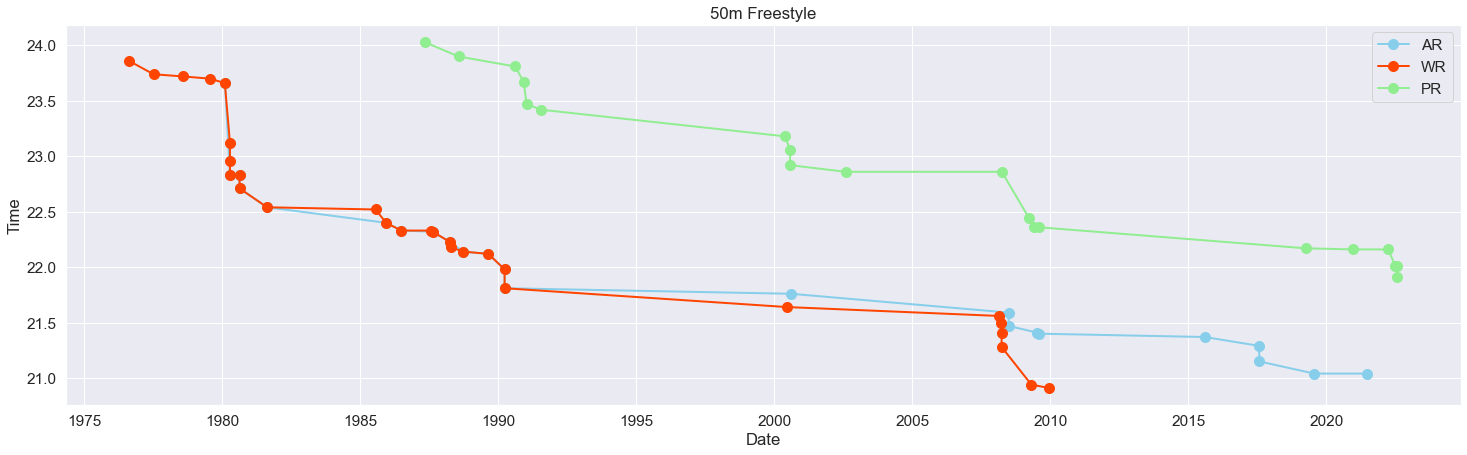

In [84]:
# Graph for 50m Freestyle

plt.figure(figsize=(25, 7))
plt.plot(AR_Free50['NewDate'], AR_Free50['NewTime'], linewidth = 2, marker='o', color='skyblue', markersize=10, label='AR')
plt.plot(WR_Free50['NewDate'], WR_Free50['NewTime'], linewidth = 2, marker='o', color='orangered', markersize=10, label='WR')
plt.plot(PR_Free50['NewDate'], PR_Free50['NewTime'], linewidth = 2, marker='o', color='lightgreen', markersize=10, label='PR')
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("50m Freestyle")
plt.legend()

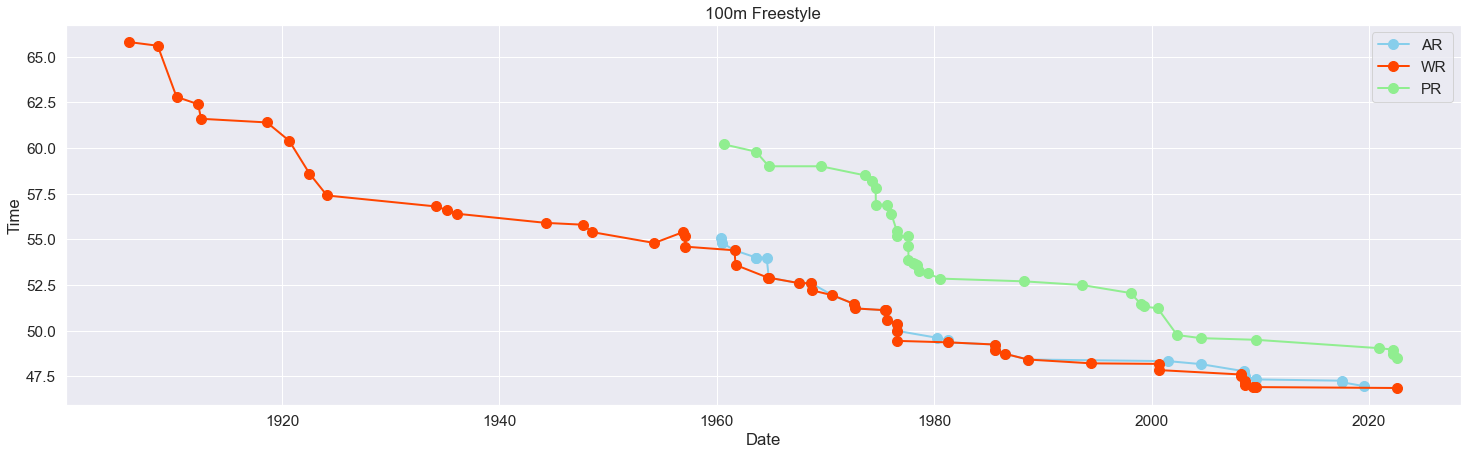

In [85]:
# Graph for 100m Freestyle

plt.figure(figsize=(25, 7))
plt.plot(AR_Free100['NewDate'], AR_Free100['NewTime'], linewidth = 2, marker='o', color='skyblue', markersize=10, label='AR')
plt.plot(WR_Free100['NewDate'], WR_Free100['NewTime'], linewidth = 2, marker='o', color='orangered', markersize=10, label='WR')
plt.plot(PR_Free100['NewDate'], PR_Free100['NewTime'], linewidth = 2, marker='o', color='lightgreen', markersize=10, label='PR')
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("100m Freestyle")
plt.legend()

##### 5.1.2) Freestyle midle distances Events

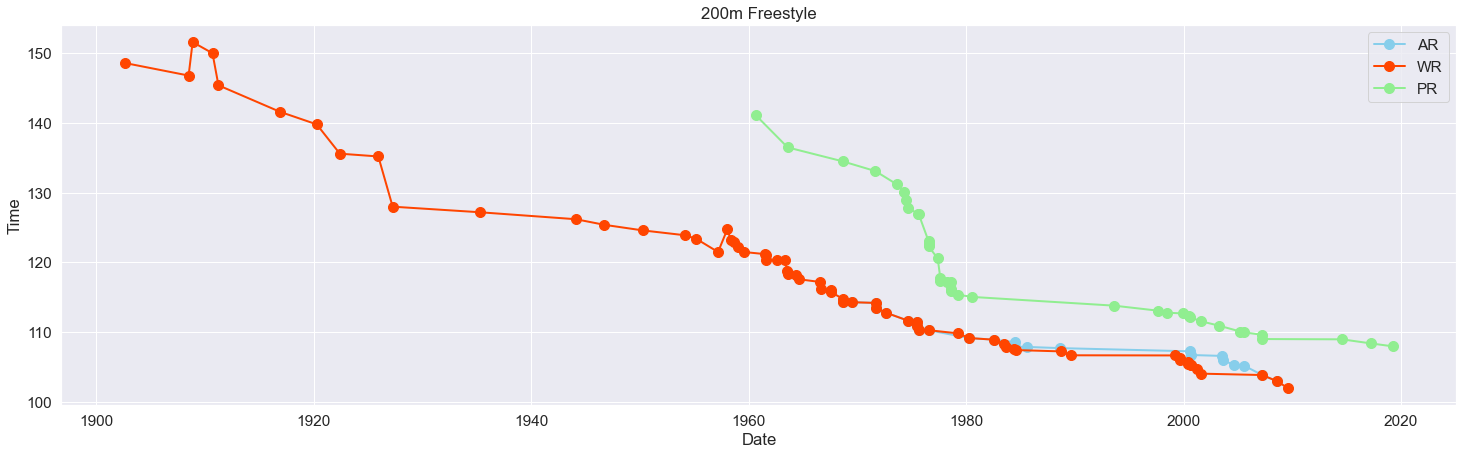

In [86]:
# Graph for 200m Freestyle

plt.figure(figsize=(25, 7))
plt.plot(AR_Free200['NewDate'], AR_Free200['NewTime'], linewidth = 2, marker='o', color='skyblue', markersize=10, label='AR')
plt.plot(WR_Free200['NewDate'], WR_Free200['NewTime'], linewidth = 2, marker='o', color='orangered', markersize=10, label='WR')
plt.plot(PR_Free200['NewDate'], PR_Free200['NewTime'], linewidth = 2, marker='o', color='lightgreen', markersize=10, label='PR')
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("200m Freestyle")
plt.legend()

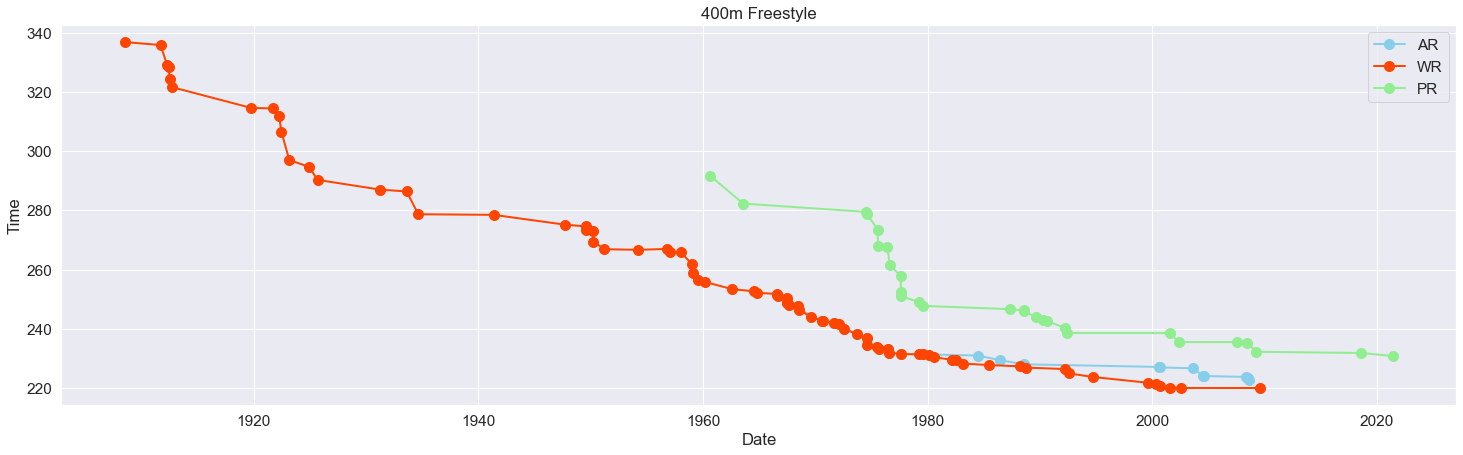

In [87]:
# Graph for 400m Freestyle

plt.figure(figsize=(25, 7))
plt.plot(AR_Free400['NewDate'], AR_Free400['NewTime'], linewidth = 2, marker='o', color='skyblue', markersize=10, label='AR')
plt.plot(WR_Free400['NewDate'], WR_Free400['NewTime'], linewidth = 2, marker='o', color='orangered', markersize=10, label='WR')
plt.plot(PR_Free400['NewDate'], PR_Free400['NewTime'], linewidth = 2, marker='o', color='lightgreen', markersize=10, label='PR')
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("400m Freestyle")
plt.legend()

##### 5.1.3) Freestyle long distances Events

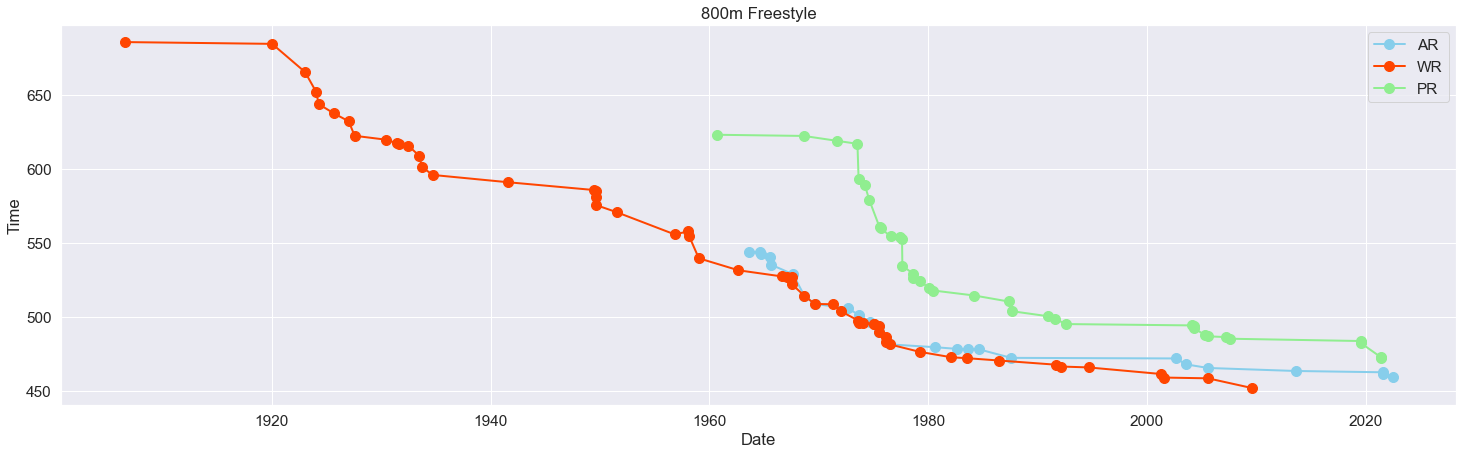

In [88]:
# Graph for 800m Freestyle

plt.figure(figsize=(25, 7))
plt.plot(AR_Free800['NewDate'], AR_Free800['NewTime'], linewidth = 2, marker='o', color='skyblue', markersize=10, label='AR')
plt.plot(WR_Free800['NewDate'], WR_Free800['NewTime'], linewidth = 2, marker='o', color='orangered', markersize=10, label='WR')
plt.plot(PR_Free800['NewDate'], PR_Free800['NewTime'], linewidth = 2, marker='o', color='lightgreen', markersize=10, label='PR')
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("800m Freestyle")
plt.legend()

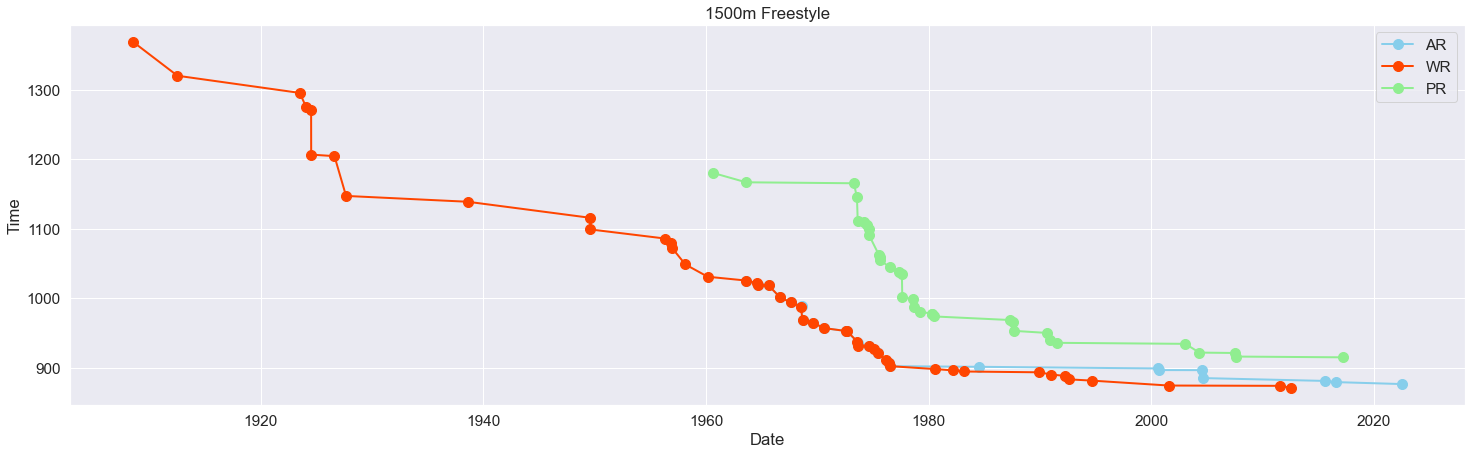

In [89]:
# Graph for 400m Freestyle

plt.figure(figsize=(25, 7))
plt.plot(AR_Free1500['NewDate'], AR_Free1500['NewTime'], linewidth = 2, marker='o', color='skyblue', markersize=10, label='AR')
plt.plot(WR_Free1500['NewDate'], WR_Free1500['NewTime'], linewidth = 2, marker='o', color='orangered', markersize=10, label='WR')
plt.plot(PR_Free1500['NewDate'], PR_Free1500['NewTime'], linewidth = 2, marker='o', color='lightgreen', markersize=10, label='PR')
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("1500m Freestyle")
plt.legend()

##### 5.1.4) Backstroke Events

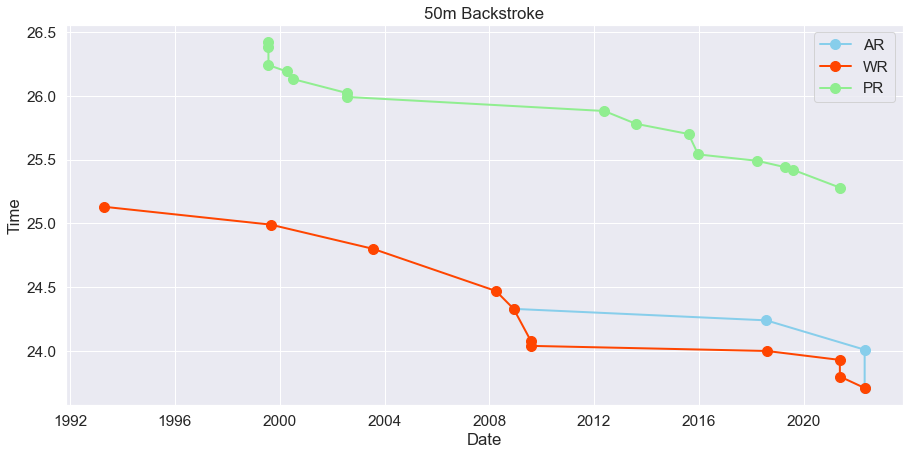

In [90]:
# Graph for 50m Backstroke

plt.figure(figsize=(15, 7))
plt.plot(AR_Back50['NewDate'], AR_Back50['NewTime'], linewidth = 2, marker='o', color='skyblue', markersize=10, label='AR')
plt.plot(WR_Back50['NewDate'], WR_Back50['NewTime'], linewidth = 2, marker='o', color='orangered', markersize=10, label='WR')
plt.plot(PR_Back50['NewDate'], PR_Back50['NewTime'], linewidth = 2, marker='o', color='lightgreen', markersize=10, label='PR')
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("50m Backstroke")
plt.legend()

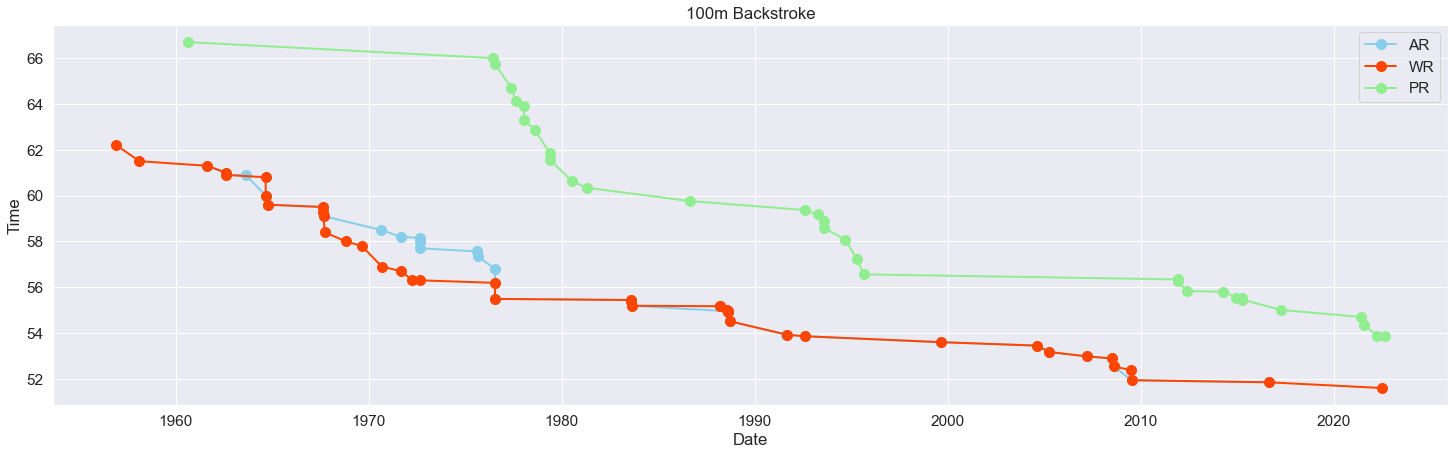

In [91]:
# Graph for 100m Backstroke

plt.figure(figsize=(25, 7))
plt.plot(AR_Back100['NewDate'], AR_Back100['NewTime'], linewidth = 2, marker='o', color='skyblue', markersize=10, label='AR')
plt.plot(WR_Back100['NewDate'], WR_Back100['NewTime'], linewidth = 2, marker='o', color='orangered', markersize=10, label='WR')
plt.plot(PR_Back100['NewDate'], PR_Back100['NewTime'], linewidth = 2, marker='o', color='lightgreen', markersize=10, label='PR')
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("100m Backstroke")
plt.legend()

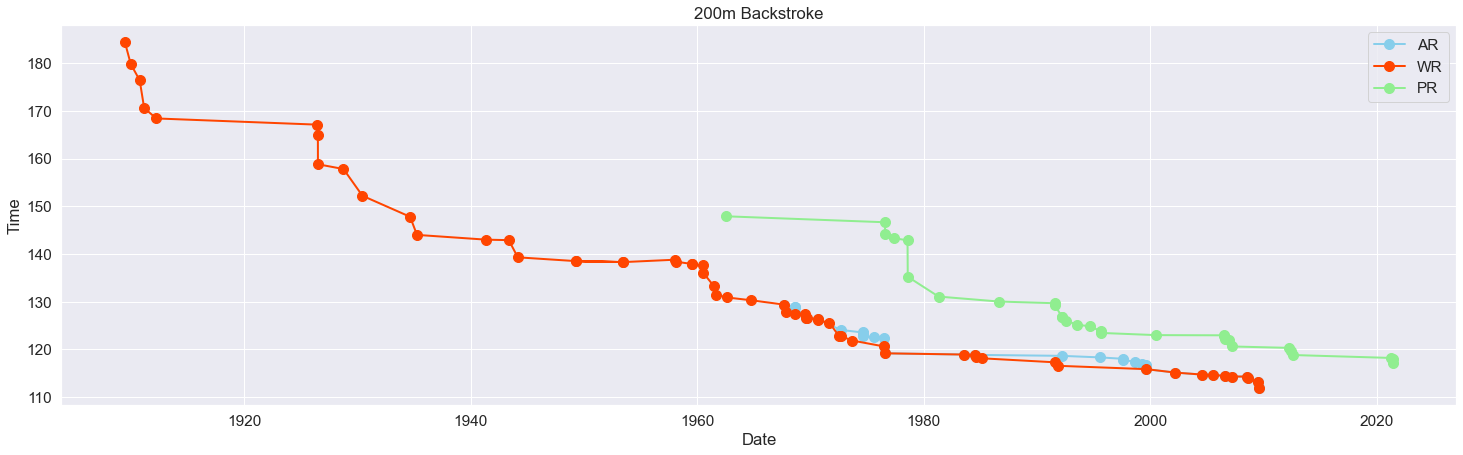

In [92]:
# Graph for 200m Backstroke

plt.figure(figsize=(25, 7))
plt.plot(AR_Back200['NewDate'], AR_Back200['NewTime'], linewidth = 2, marker='o', color='skyblue', markersize=10, label='AR')
plt.plot(WR_Back200['NewDate'], WR_Back200['NewTime'], linewidth = 2, marker='o', color='orangered', markersize=10, label='WR')
plt.plot(PR_Back200['NewDate'], PR_Back200['NewTime'], linewidth = 2, marker='o', color='lightgreen', markersize=10, label='PR')
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("200m Backstroke")
plt.legend()

##### 5.1.5) Breaststroke Events

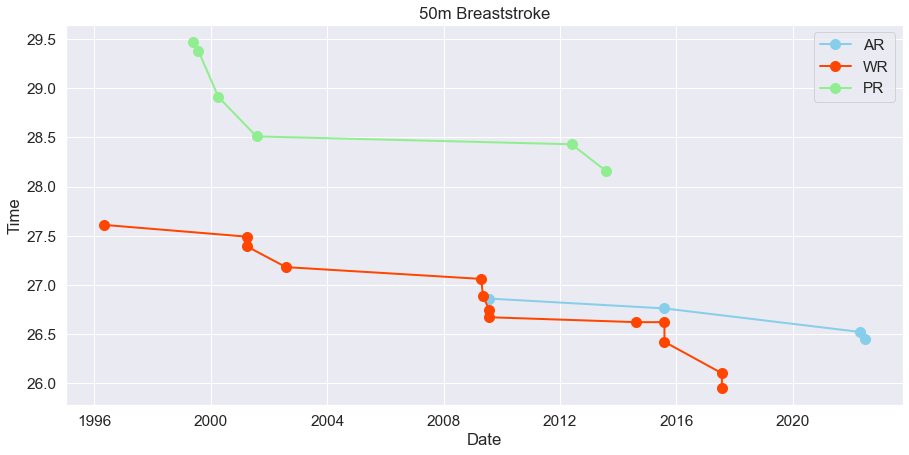

In [93]:
# Graph for 50m Breaststroke

plt.figure(figsize=(15, 7))
plt.plot(AR_Breast50['NewDate'], AR_Breast50['NewTime'], linewidth = 2, marker='o', color='skyblue', markersize=10, label='AR')
plt.plot(WR_Breast50['NewDate'], WR_Breast50['NewTime'], linewidth = 2, marker='o', color='orangered', markersize=10, label='WR')
plt.plot(PR_Breast50['NewDate'], PR_Breast50['NewTime'], linewidth = 2, marker='o', color='lightgreen', markersize=10, label='PR')
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("50m Breaststroke")
plt.legend()

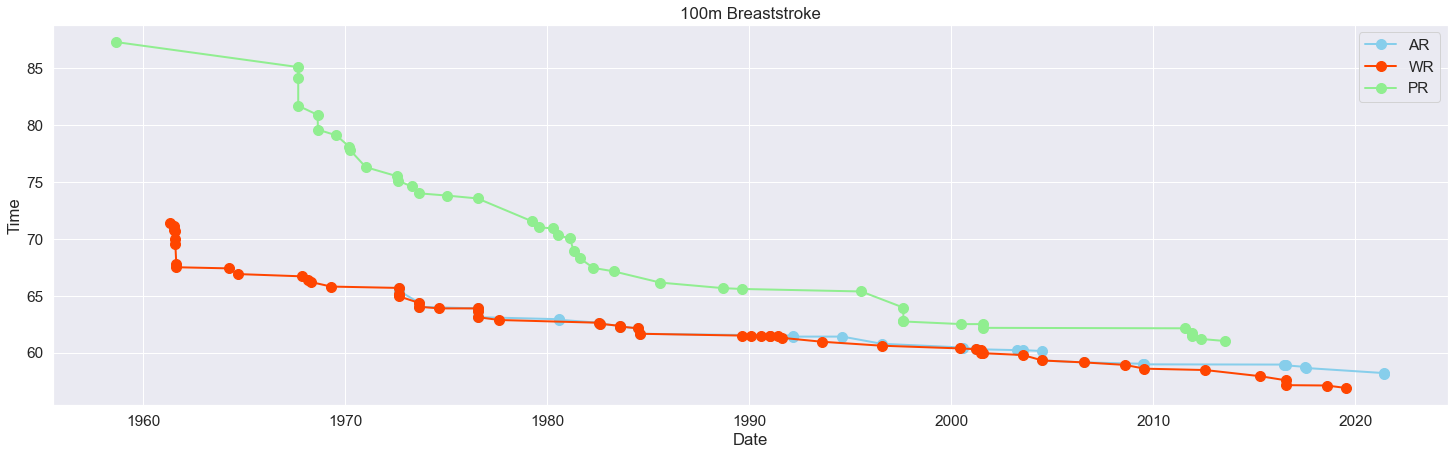

In [94]:
# Graph for 100m Breaststroke

plt.figure(figsize=(25, 7))
plt.plot(AR_Breast100['NewDate'], AR_Breast100['NewTime'], linewidth = 2, marker='o', color='skyblue', markersize=10, label='AR')
plt.plot(WR_Breast100['NewDate'], WR_Breast100['NewTime'], linewidth = 2, marker='o', color='orangered', markersize=10, label='WR')
plt.plot(PR_Breast100['NewDate'], PR_Breast100['NewTime'], linewidth = 2, marker='o', color='lightgreen', markersize=10, label='PR')
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("100m Breaststroke")
plt.legend()

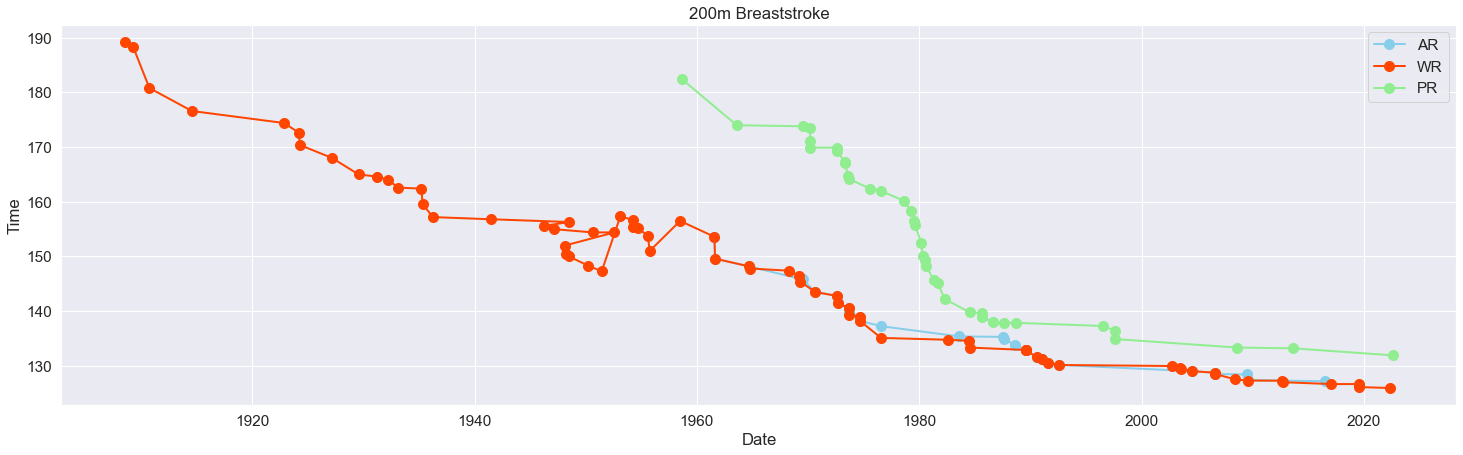

In [95]:
# Graph for 200m Breaststroke

plt.figure(figsize=(25, 7))
plt.plot(AR_Breast200['NewDate'], AR_Breast200['NewTime'], linewidth = 2, marker='o', color='skyblue', markersize=10, label='AR')
plt.plot(WR_Breast200['NewDate'], WR_Breast200['NewTime'], linewidth = 2, marker='o', color='orangered', markersize=10, label='WR')
plt.plot(PR_Breast200['NewDate'], PR_Breast200['NewTime'], linewidth = 2, marker='o', color='lightgreen', markersize=10, label='PR')
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("200m Breaststroke")
plt.legend()

##### 5.1.6) Butterfly Events

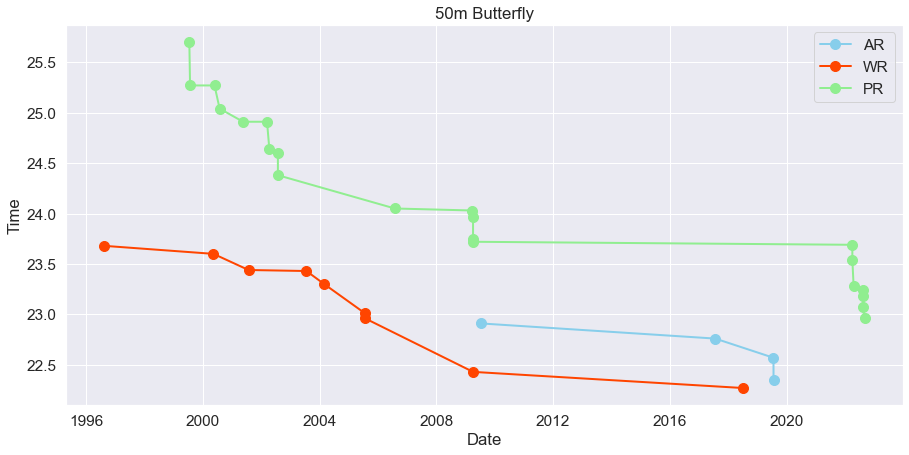

In [96]:
# Graph for 50m Butterfly

plt.figure(figsize=(15, 7))
plt.plot(AR_Butterf50['NewDate'], AR_Butterf50['NewTime'], linewidth = 2, marker='o', color='skyblue', markersize=10, label='AR')
plt.plot(WR_Butterf50['NewDate'], WR_Butterf50['NewTime'], linewidth = 2, marker='o', color='orangered', markersize=10, label='WR')
plt.plot(PR_Butterf50['NewDate'], PR_Butterf50['NewTime'], linewidth = 2, marker='o', color='lightgreen', markersize=10, label='PR')
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("50m Butterfly")
plt.legend()

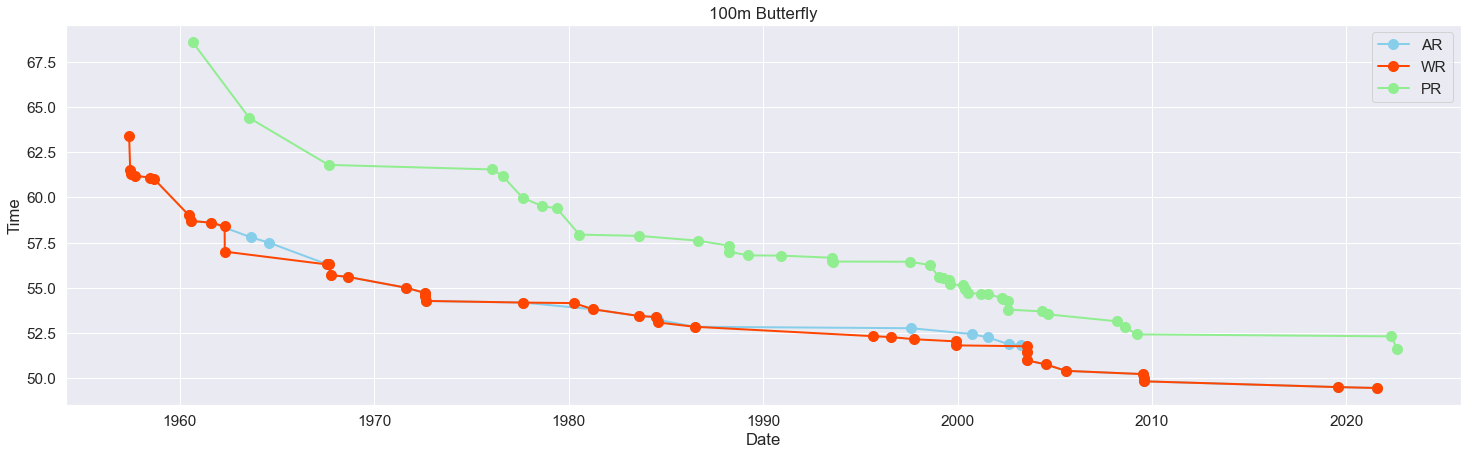

In [97]:
# Graph for 100m Butterfly

plt.figure(figsize=(25, 7))
plt.plot(AR_Butterf100['NewDate'], AR_Butterf100['NewTime'], linewidth = 2, marker='o', color='skyblue', markersize=10, label='AR')
plt.plot(WR_Butterf100['NewDate'], WR_Butterf100['NewTime'], linewidth = 2, marker='o', color='orangered', markersize=10, label='WR')
plt.plot(PR_Butterf100['NewDate'], PR_Butterf100['NewTime'], linewidth = 2, marker='o', color='lightgreen', markersize=10, label='PR')
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("100m Butterfly")
plt.legend()

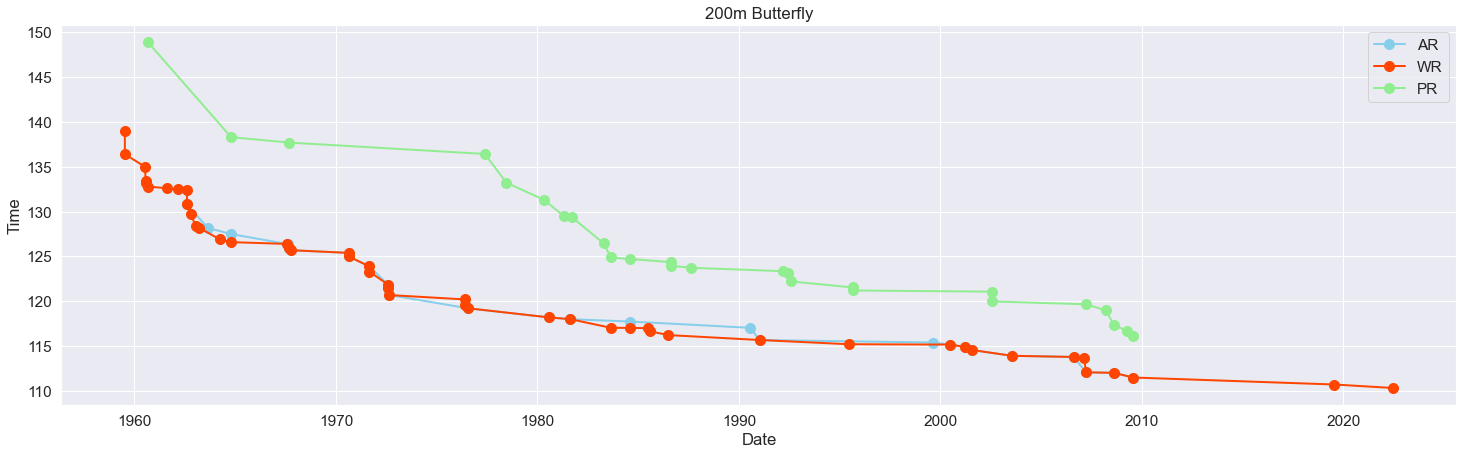

In [98]:
# Graph for 200m Butterfly

plt.figure(figsize=(25, 7))
plt.plot(AR_Butterf200['NewDate'], AR_Butterf200['NewTime'], linewidth = 2, marker='o', color='skyblue', markersize=10, label='AR')
plt.plot(WR_Butterf200['NewDate'], WR_Butterf200['NewTime'], linewidth = 2, marker='o', color='orangered', markersize=10, label='WR')
plt.plot(PR_Butterf200['NewDate'], PR_Butterf200['NewTime'], linewidth = 2, marker='o', color='lightgreen', markersize=10, label='PR')
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("200m Butterfly")
plt.legend()

##### 5.1.7) Medley Events

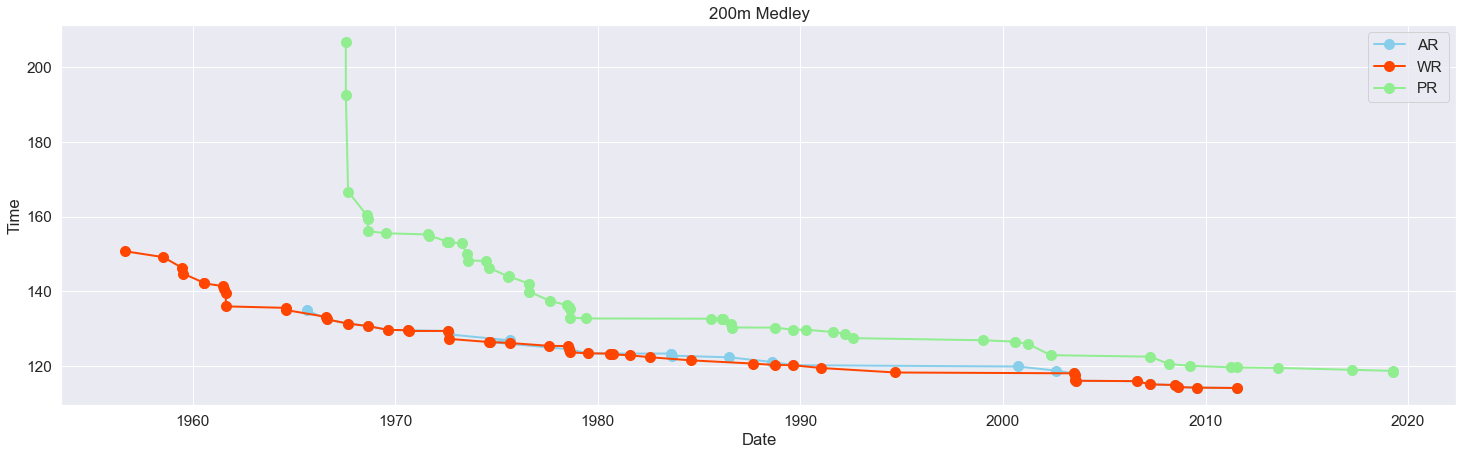

In [99]:
# Graph for 200m Medley

plt.figure(figsize=(25, 7))
plt.plot(AR_Medley200['NewDate'], AR_Medley200['NewTime'], linewidth = 2, marker='o', color='skyblue', markersize=10, label='AR')
plt.plot(WR_Medley200['NewDate'], WR_Medley200['NewTime'], linewidth = 2, marker='o', color='orangered', markersize=10, label='WR')
plt.plot(PR_Medley200['NewDate'], PR_Medley200['NewTime'], linewidth = 2, marker='o', color='lightgreen', markersize=10, label='PR')
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("200m Medley")
plt.legend()

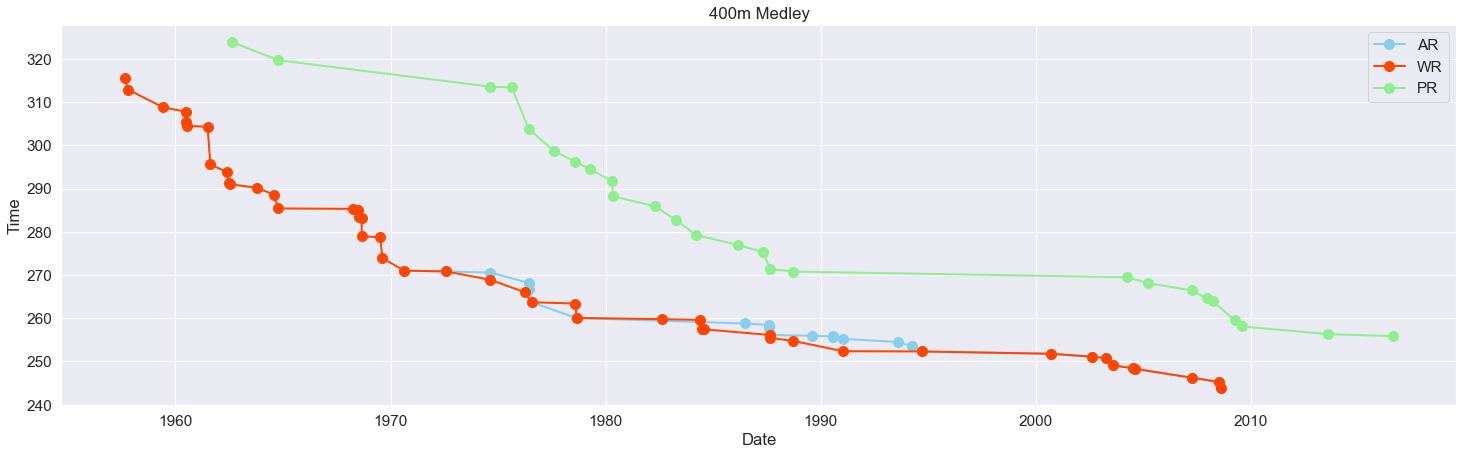

In [100]:
# Graph for 400m Medley

plt.figure(figsize=(25, 7))
plt.plot(AR_Medley400['NewDate'], AR_Medley400['NewTime'], linewidth = 2, marker='o', color='skyblue', markersize=10, label='AR')
plt.plot(WR_Medley400['NewDate'], WR_Medley400['NewTime'], linewidth = 2, marker='o', color='orangered', markersize=10, label='WR')
plt.plot(PR_Medley400['NewDate'], PR_Medley400['NewTime'], linewidth = 2, marker='o', color='lightgreen', markersize=10, label='PR')
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("400m Medley")
plt.legend()